In [1]:
!pip install music21

     |████████████████████████████████| 19.2 MB 21.8 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for music21: filename=music21-6.7.1-py3-none-any.whl size=21941692 sha256=563261a50747161352fd965a7e7ffed6f1ee4c31edf1ee002e4da312790ebe78
  Stored in directory: /home/ec2-user/.cache/pip/wheels/66/b8/68/c374fb21ae1e0faea5b8bc7e537b8e89e91da904edc5c3e224
Successfully built music21


In [2]:
from music21 import midi
import os
import numpy as np
from PIL import Image

# 1. Input song into midi2song, get image, then song again

In [3]:
from music21 import converter, instrument, note, chord
import sys
import numpy as np
from imageio import imwrite

def extractNote(element):
    return int(element.pitch.ps)

def extractDuration(element):
    return element.duration.quarterLength

def get_notes(notes_to_parse):

    """ Get all the notes and chords from the midi files in the ./midi_songs directory """
    durations = []
    notes = []
    start = []

    for element in notes_to_parse:
        if isinstance(element, note.Note):
            if element.isRest:
                continue

            start.append(element.offset)
            notes.append(extractNote(element))
            durations.append(extractDuration(element))
                
        elif isinstance(element, chord.Chord):
            if element.isRest:
                continue
            for chord_note in element.notes:
                start.append(element.offset)
                durations.append(extractDuration(element))
                notes.append(extractNote(chord_note))

    return {"start":start, "pitch":notes, "dur":durations}


def midi2image(midi_path, max_repetitions = float("inf"), resolution = 0.25, lowerBoundNote = 21, upperBoundNote = 127, maxSongLength = 100):
    mid = converter.parse(midi_path)

    instruments = instrument.partitionByInstrument(mid)

    data = {}

    try:
        i=0
        for instrument_i in instruments.parts:
            notes_to_parse = instrument_i.recurse()

            notes_data = get_notes(notes_to_parse)
            if len(notes_data["start"]) == 0:
                continue

            if instrument_i.partName is None:
                data["instrument_{}".format(i)] = notes_data
                i+=1
            else:
                data[instrument_i.partName] = notes_data

    except:
        notes_to_parse = mid.flat.notes
        data["instrument_0"] = get_notes(notes_to_parse)

    for instrument_name, values in data.items():
        # https://en.wikipedia.org/wiki/Scientific_pitch_notation#Similar_systems

        pitches = values["pitch"]
        durs = values["dur"]
        starts = values["start"]

        index = 0
        while index < max_repetitions:
            matrix = np.zeros((upperBoundNote-lowerBoundNote,maxSongLength))


            for dur, start, pitch in zip(durs, starts, pitches):
                dur = int(dur/resolution)
                start = int(start/resolution)

                if not start > index*(maxSongLength+1) or not dur+start < index*maxSongLength:
                    for j in range(start,start+dur):
                        if j - index*maxSongLength >= 0 and j - index*maxSongLength < maxSongLength:
                            matrix[pitch-lowerBoundNote,j - index*maxSongLength] = 255

            if matrix.any(): # If matrix contains no notes (only zeros) don't save it
                imwrite(midi_path.split("/")[-1].replace(".mid",f"_{instrument_name}_{index}.png"),matrix.astype(np.uint8))
                index += 1
            else:
                break

# if __name__ == "__main__":
#     midi_path = sys.argv[1]
#     print(midi_path)

#     if len(sys.argv) >= 3:
#         max_repetitions = int(sys.argv[2])
#         midi2image(midi_path, max_repetitions)
#     else:
#         midi2image(midi_path)

In [5]:
midi2image(os.getcwd() + '/classical-00000.mid')

In [8]:
image2midi(os.getcwd() + '/classical-00000_Piano_0.png')

In [34]:
im = Image.open(os.getcwd() + '/classical-00000_Piano_0.png')
im = im.resize((106, 106))
im.size

(106, 106)

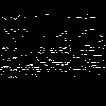

In [35]:
im

In [36]:
im.size

(106, 106)

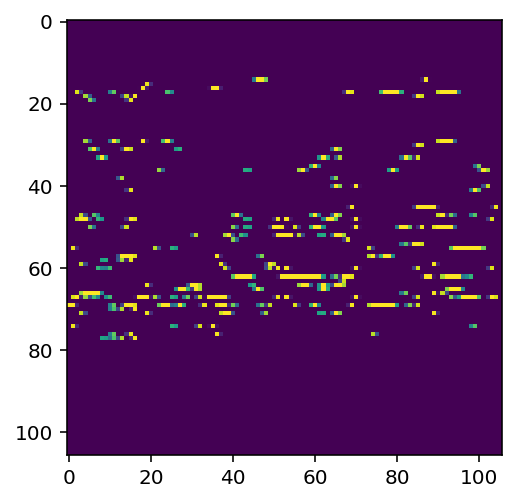

In [37]:
import matplotlib.pyplot as plt 

plt.imshow(im);

In [39]:
np.array(im.getdata()).reshape((106, 106))[50:100, 0:50]

array([[ 0,  0,  0, ...,  0,  0, 38],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

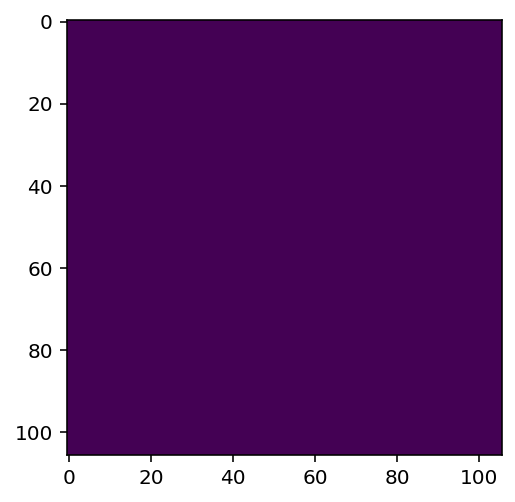

In [52]:
arr = np.array(im.getdata()).reshape(106, 106)

# arr*= 255;

new_image = Image.fromarray(arr, 'L')

# plt.imshow(new_image)

# 2. Input image to get song

In [23]:
path = os.getcwd() + '/Image files/Classical - images'

img_list = os.listdir(path)

print(img_list)

['classical00018.png', 'classical00017.png', 'classical00015.png', 'classical00070.png', 'classical00087.png', 'classical00044.png', 'classical00041.png', 'classical00079.png', 'classical00004.png', 'classical00064.png', 'classical00050.png', 'classical00030.png', 'classical00078.png', 'classical00038.png', 'classical00072.png', 'classical00060.png', 'classical00006.png', 'classical00083.png', 'classical00092.png', 'classical00048.png', 'classical00009.png', 'classical00090.png', 'classical00065.png', 'classical00042.png', 'classical00069.png', 'classical00047.png', 'classical00080.png', 'classical00053.png', 'classical00040.png', 'classical00033.png', 'classical00025.png', 'classical00071.png', 'classical00032.png', 'classical00054.png', 'classical00039.png', 'classical00063.png', 'classical00045.png', 'classical00046.png', 'classical00077.png', 'classical00052.png', 'classical00020.png', 'classical00067.png', 'classical00051.png', 'classical00096.png', 'classical00088.png', 'classica

In [68]:
def access_images(img_list,path):
    pixels = []
    imgs = []
    for i in range(len(img_list)):
        if 'png' in img_list[i]:
            try:
                img = Image.open(path+'/'+img_list[i],'r')
#                 img = img.convert('1')
#                 print(img)
                img = img.resize((106, 106)) # added by me (turns them into smaller images)
                pix = np.array(img.getdata())
#                 print(pix)
                pix = pix.astype('float32')
#                 pix /= 255.0
                pixels.append(pix.reshape(106, 106, 4))
                imgs.append(img)
            except:
                pass
    return np.array(pixels),imgs

In [69]:
def show_image(pix_list):
    array = np.array(pix_list.reshape(106,106), dtype=np.uint8)
    new_image = Image.fromarray(array)
    new_image.show()

In [70]:
pixels,imgs = access_images(img_list,path)

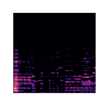

In [71]:
imgs[0]

In [75]:
type(imgs[0])

PIL.Image.Image

In [76]:
imgs[0].save('classical-0-test-to-midi.png')

In [73]:
np.shape(pixels)

(100, 106, 106, 4)

In [7]:
from PIL import Image
import numpy as np
from music21 import instrument, note, chord, stream

lowerBoundNote = 21
def column2notes(column):
    notes = []
    for i in range(len(column)):
        if column[i] > 255/2:
            notes.append(i+lowerBoundNote)
    return notes

resolution = 0.25
def updateNotes(newNotes,prevNotes): 
    res = {} 
    for note in newNotes:
        if note in prevNotes:
            res[note] = prevNotes[note] + resolution
        else:
            res[note] = resolution
    return res

def image2midi(image_path):
    with Image.open(image_path) as image:
        im_arr = np.frombuffer(image.tobytes(), dtype=np.uint8)
        try:
            im_arr = im_arr.reshape((image.size[1], image.size[0]))
        except:
            im_arr = im_arr.reshape((image.size[1], image.size[0],3))
            im_arr = np.dot(im_arr, [0.33, 0.33, 0.33])

    """ convert the output from the prediction to notes and create a midi file
        from the notes """
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model

    prev_notes = updateNotes(im_arr.T[0,:],{})
    for column in im_arr.T[1:,:]:
        notes = column2notes(column)
        # pattern is a chord
        notes_in_chord = notes
        old_notes = prev_notes.keys()
        for old_note in old_notes:
            if not old_note in notes_in_chord:
                new_note = note.Note(old_note,quarterLength=prev_notes[old_note])
                new_note.storedInstrument = instrument.Piano()
                if offset - prev_notes[old_note] >= 0:
                    new_note.offset = offset - prev_notes[old_note]
                    output_notes.append(new_note)
                elif offset == 0:
                    new_note.offset = offset
                    output_notes.append(new_note)                    
                else:
                    print(offset,prev_notes[old_note],old_note)

        prev_notes = updateNotes(notes_in_chord,prev_notes)

        # increase offset each iteration so that notes do not stack
        offset += resolution

    for old_note in prev_notes.keys():
        new_note = note.Note(old_note,quarterLength=prev_notes[old_note])
        new_note.storedInstrument = instrument.Piano()
        new_note.offset = offset - prev_notes[old_note]

        output_notes.append(new_note)

    prev_notes = updateNotes(notes_in_chord,prev_notes)

    midi_stream = stream.Stream(output_notes)

    midi_stream.write('midi', fp=image_path.split("/")[-1].replace(".png",".mid"))

In [80]:
np.shape(pixels[0])

(106, 106, 4)

In [85]:
z = imgs[0].convert('RGB'); 
arr = np.array(z.getdata()).reshape(106, 106, 3); 
np.shape(arr)

(106, 106, 3)

In [86]:
z.save('classical-0-test-to-midi.png')

In [81]:
pixels[0]

array([[[255., 255., 255., 255.],
        [255., 255., 255., 255.],
        [255., 255., 255., 255.],
        ...,
        [255., 255., 255., 255.],
        [255., 255., 255., 255.],
        [255., 255., 255., 255.]],

       [[255., 255., 255., 255.],
        [255., 255., 255., 255.],
        [255., 255., 255., 255.],
        ...,
        [255., 255., 255., 255.],
        [255., 255., 255., 255.],
        [255., 255., 255., 255.]],

       [[255., 255., 255., 255.],
        [255., 255., 255., 255.],
        [255., 255., 255., 255.],
        ...,
        [255., 255., 255., 255.],
        [255., 255., 255., 255.],
        [255., 255., 255., 255.]],

       ...,

       [[255., 255., 255., 255.],
        [255., 255., 255., 255.],
        [255., 255., 255., 255.],
        ...,
        [255., 255., 255., 255.],
        [255., 255., 255., 255.],
        [255., 255., 255., 255.]],

       [[255., 255., 255., 255.],
        [255., 255., 255., 255.],
        [255., 255., 255., 255.],
        .

In [87]:
image2midi(os.getcwd() + '/classical-0-test-to-midi.png')